<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Fabián Rubilar 
## 201510509-K


## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

### Pregunta 1


In [4]:
#Primero haremos un dataframe para cada grupo
grupo_1 = df.loc[:, 'grupo'] == 'Grupo_1'
df_grupo_1 = df.loc[grupo_1]

grupo_2 = df.loc[:, 'grupo'] == 'Grupo_2'
df_grupo_2 = df.loc[grupo_2]

grupo_3 = df.loc[:, 'grupo'] == 'Grupo_3'
df_grupo_3 = df.loc[grupo_3]

grupo_4 = df.loc[:, 'grupo'] == 'Grupo_4'
df_grupo_4 = df.loc[grupo_4]


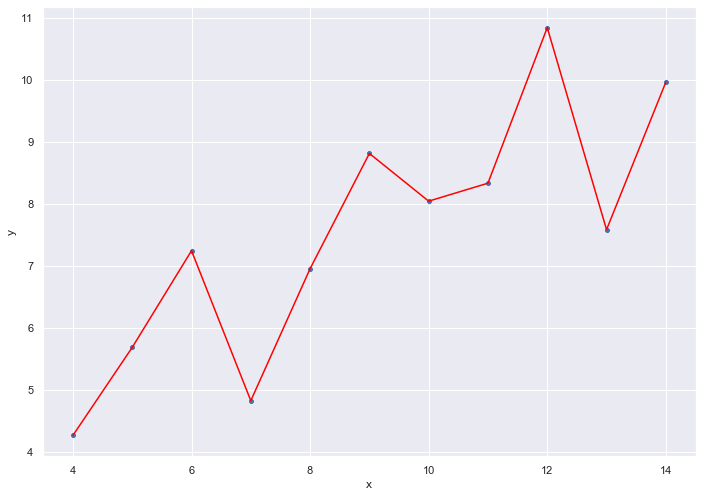

In [5]:
#Ahora graficaremos cada grupo mediante un gráfico tipo scatter

sns.scatterplot(x='x', y='y', data=df_grupo_1)
sns.lineplot(x='x', y='y', data=df_grupo_1,color="red")
plt.show()

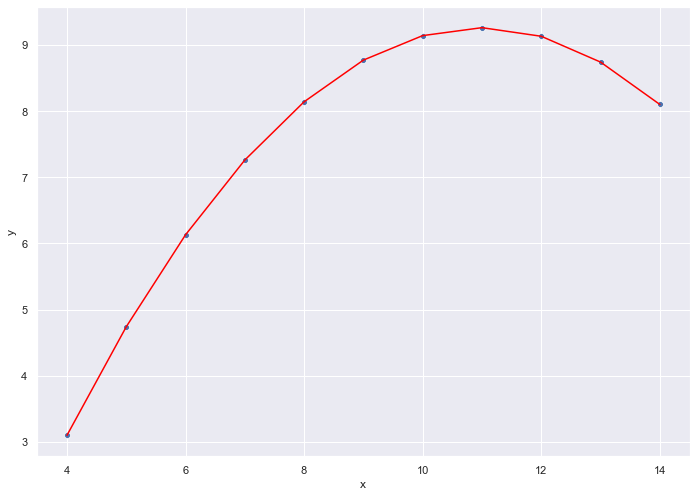

In [6]:
sns.scatterplot(x='x', y='y', data=df_grupo_2)
sns.lineplot(x='x', y='y', data=df_grupo_2,color="red")
plt.show()

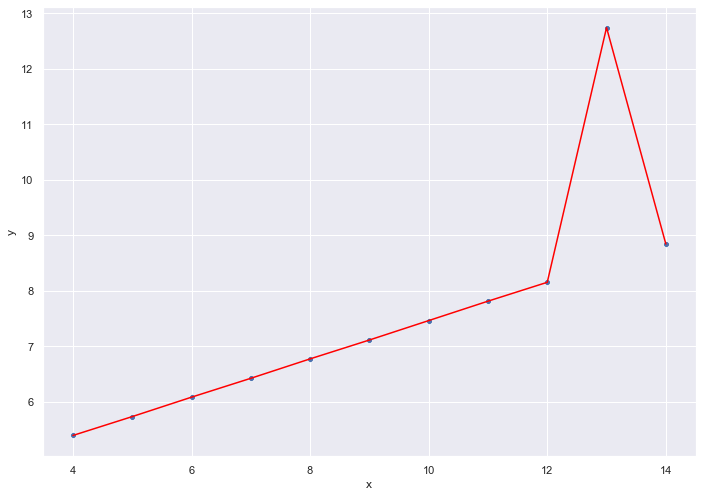

In [7]:
sns.scatterplot(x='x', y='y', data=df_grupo_3)
sns.lineplot(x='x', y='y', data=df_grupo_3,color="red")
plt.show()

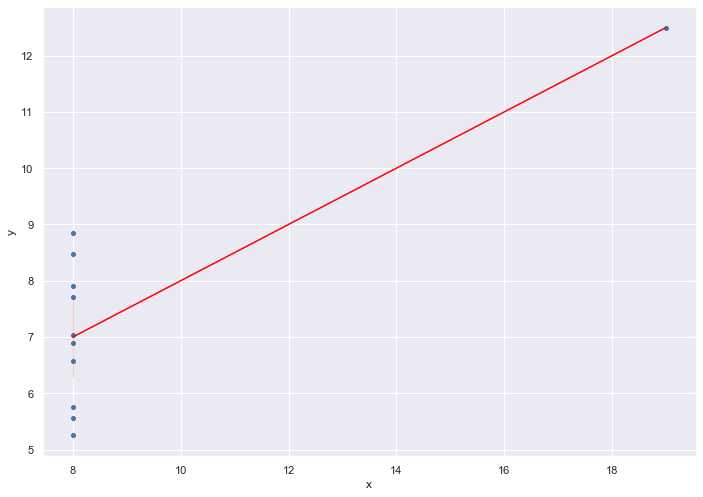

In [8]:
sns.scatterplot(x='x', y='y', data=df_grupo_4)
sns.lineplot(x='x', y='y', data=df_grupo_4,color="red")
plt.show()

#### Interpretación: Lo gráficos son muy diferentes entre sí, ya que la dispersión de datos en los grupos es diferente, basta comparar el gráfico del grupo 4 con los otros 3.

### Pregunta 2


In [9]:
df_grupo_1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [10]:
df_grupo_2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [11]:
df_grupo_3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [12]:
df_grupo_4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


#### Interpretación: Notamos que la media y la desviación estándar de los grupos son iguales, lo que en primera instancia haría pensar que los datos se comportan de manera similar. Pero esto claramente no es cierto, basta ver los gráficos en pregunta 1. 

### Pregunta 3 - Pregunta 4


#### $\bullet$ Para el primer grupo tenemos que:

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with

X = df_grupo_1[['x']] # we only take the first two features.
y = df_grupo_1['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))


Separando informacion:

numero de filas data original :  11
numero de filas train set     :  8
numero de filas test set      :  3


In [14]:
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

model_rl_1 = LinearRegression() # Creando el modelo.

In [15]:
# ajustando el modelo
model_rl_1.fit(df_grupo_1[['x']], df_grupo_1['y']) 
#model_rl_1.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Lista de coeficientes B para cada X

beta_0 = round(model_rl_1.intercept_,2)
beta_1 = round(model_rl_1.coef_[0],2)

print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
f(x) = {beta_0} + {beta_1}*y")

El mejor ajuste lineal viene dado por la recta: 

     f(x) = 3.0 + 0.5*y


In [17]:
# predicciones
Y_predict = model_rl_1.predict(X_test)
Y_predict

array([10.00136364,  8.001     ,  6.50072727])

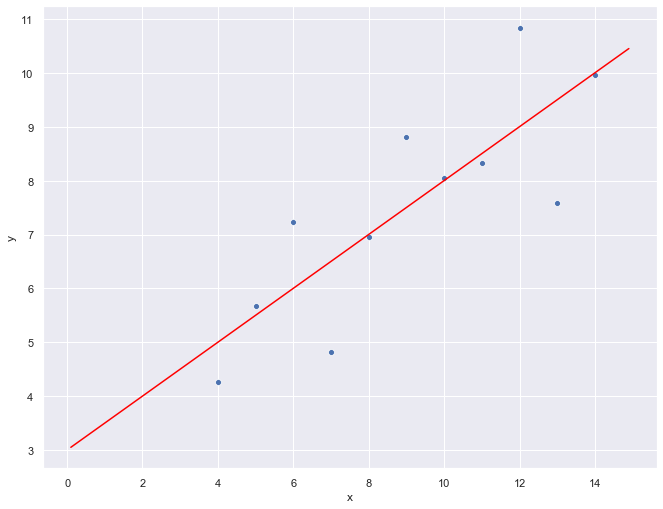

In [18]:
# graficos con seaborn
        
beta_0 = model_rl_1.intercept_
beta_1 = model_rl_1.coef_[0]
        
x_range = np.arange(0.1,15,0.1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df_1 = pd.DataFrame({'x':X['x'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df_1, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

####  $\bullet$ Métricas para el primer grupo

In [19]:
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo 
df_temp_1 = pd.DataFrame(
    {
        'y':df_grupo_1['y'],
        'yhat': model_rl_1.predict(df_grupo_1[['x']])
        }
)

df_metrics_1 = summary_metrics(df_temp_1)
df_metrics_1['r2'] =  round(r2_score(df_grupo_1['y'], model_rl_1.predict(df_grupo_1[['x']])),4)
#df_metrics_1['r2'] =  round(r2_score(y_test, model_rl_1.predict(X_test)),4)
#print('\nMetricas para el regresor consumo_litros_milla:\n')
print(df_metrics_1)

      mae     mse    rmse    mape  maape   wmape   mmape   smape      r2
0  0.8374  1.2512  1.1185  0.1213  0.119  0.1116  0.1048  0.1167  0.6665


#### $\bullet$ Para el segundo grupo tenemos que:

In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with

X = df_grupo_2[['x']] # we only take the first two features.
y = df_grupo_2['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  11
numero de filas train set     :  8
numero de filas test set      :  3


In [21]:
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

model_rl_2 = LinearRegression() # Creando el modelo.

In [22]:
# ajustando el modelo
model_rl_2.fit(df_grupo_2[['x']], df_grupo_2['y']) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# Lista de coeficientes B para cada X

beta_0 = round(model_rl_2.intercept_,2)
beta_1 = round(model_rl_2.coef_[0],2)

print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
f(x) = {beta_0} + {beta_1}*y")

El mejor ajuste lineal viene dado por la recta: 

     f(x) = 3.0 + 0.5*y


In [24]:
# predicciones
Y_predict = model_rl_2.predict(X_test)
Y_predict

array([10.00090909,  8.00090909,  6.50090909])

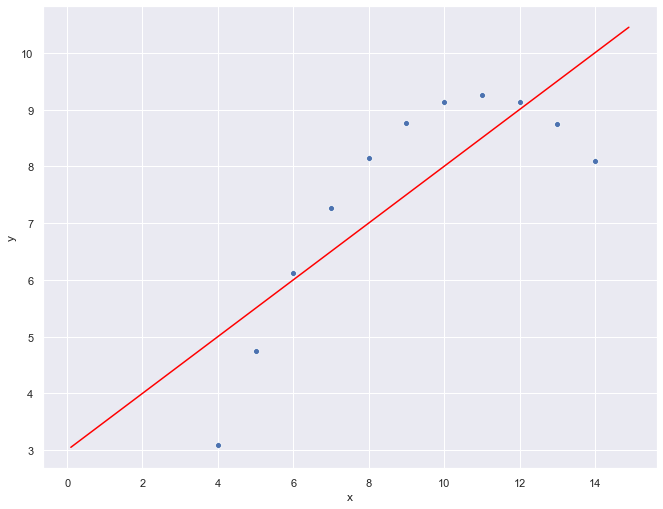

In [25]:
# graficos con seaborn
        
beta_0 = model_rl_2.intercept_
beta_1 = model_rl_2.coef_[0]
        
x_range = np.arange(0.1,15,0.1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df_2 = pd.DataFrame({'x':X['x'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df_2, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

####  $\bullet$ Métricas para el segundo grupo

In [26]:
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo 
df_temp_2 = pd.DataFrame(
    {
        'y':df_grupo_2['y'],
        'yhat': model_rl_2.predict(df_grupo_2[['x']])
        }
)

df_metrics_2 = summary_metrics(df_temp_2)
df_metrics_2['r2'] =  round(r2_score(df_grupo_2['y'], model_rl_2.predict(df_grupo_2[['x']])),4)
#print('\nMetricas para el regresor consumo_litros_milla:\n')
print(df_metrics_2)

      mae     mse    rmse   mape   maape  wmape   mmape   smape      r2
0  0.9679  1.2524  1.1191  0.157  0.1504  0.129  0.1315  0.1438  0.6662


#### $\bullet$ Para el tercer grupo tenemos que:

In [27]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with

X = df_grupo_3[['x']] # we only take the first two features.
y = df_grupo_3['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  11
numero de filas train set     :  8
numero de filas test set      :  3


In [28]:
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

model_rl_3 = LinearRegression() # Creando el modelo.

In [29]:
# ajustando el modelo
model_rl_3.fit(df_grupo_3[['x']], df_grupo_3['y']) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# Lista de coeficientes B para cada X

beta_0 = round(model_rl_3.intercept_,2)
beta_1 = round(model_rl_3.coef_[0],2)

print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
f(x) = {beta_0} + {beta_1}*y")

El mejor ajuste lineal viene dado por la recta: 

     f(x) = 3.0 + 0.5*y


In [32]:
# predicciones
Y_predict = model_rl_3.predict(X_test)
Y_predict

array([9.99863636, 7.99972727, 6.50054545])

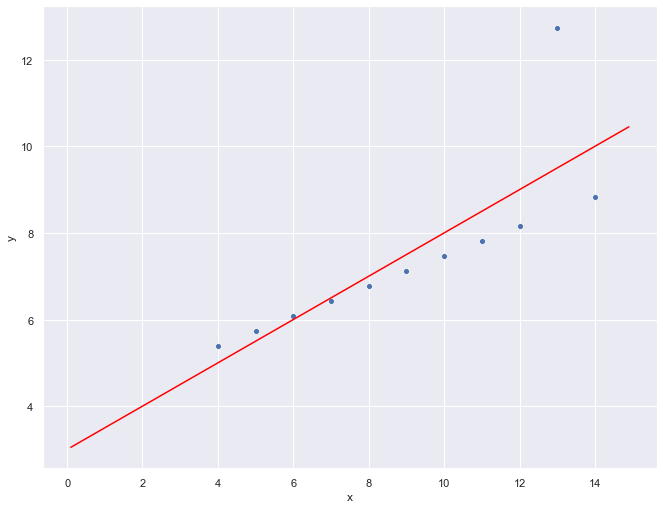

In [33]:
# graficos con seaborn
        
beta_0 = model_rl_3.intercept_
beta_1 = model_rl_3.coef_[0]
        
x_range = np.arange(0.1,15,0.1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df_3 = pd.DataFrame({'x':X['x'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df_3, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

####  $\bullet$ Métricas para el tercer grupo

In [35]:
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo 
df_temp_3 = pd.DataFrame(
    {
        'y':df_grupo_3['y'],
        'yhat': model_rl_3.predict(df_grupo_3[['x']])
        }
)

df_metrics_3 = summary_metrics(df_temp_3)
df_metrics_3['r2'] =  round(r2_score(df_grupo_3['y'], model_rl_3.predict(df_grupo_3[['x']])),4)
#print('\nMetricas para el regresor consumo_litros_milla:\n')
print(df_metrics_3)

     mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.716  1.2506  1.1183  0.0797  0.0791  0.0955  0.0712  0.0814  0.6663


#### $\bullet$ Para el cuarto grupo tenemos que:

In [36]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with

X = df_grupo_4[['x']] # we only take the first two features.
y = df_grupo_4['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  11
numero de filas train set     :  8
numero de filas test set      :  3


In [37]:
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

model_rl_4 = LinearRegression() # Creando el modelo.

In [38]:
# ajustando el modelo
model_rl_4.fit(df_grupo_4[['x']], df_grupo_4['y']) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# Lista de coeficientes B para cada X

beta_0 = round(model_rl_4.intercept_,2)
beta_1 = round(model_rl_4.coef_[0],2)

print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
f(x) = {beta_0} + {beta_1}*y")

El mejor ajuste lineal viene dado por la recta: 

     f(x) = 3.0 + 0.5*y


In [40]:
# predicciones
Y_predict = model_rl_4.predict(X_test)
Y_predict

array([7.001, 7.001, 7.001])

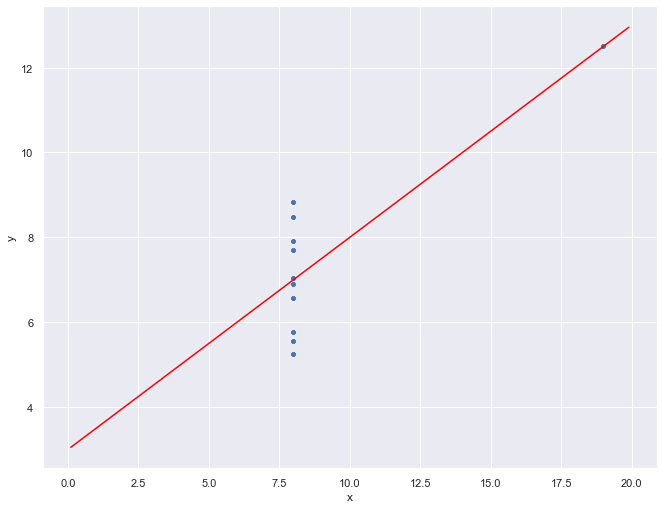

In [41]:
# graficos con seaborn
        
beta_0 = model_rl_4.intercept_
beta_1 = model_rl_4.coef_[0]
        
x_range = np.arange(0.1,20,0.1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df_4 = pd.DataFrame({'x':X['x'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df_4, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

####  $\bullet$ Métricas para el cuarto grupo

In [42]:
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo 
df_temp_4 = pd.DataFrame(
    {
        'y':df_grupo_4['y'],
        'yhat': model_rl_4.predict(df_grupo_4[['x']])
        }
)

df_metrics_4 = summary_metrics(df_temp_4)
df_metrics_4['r2'] =  round(r2_score(df_grupo_4['y'], model_rl_4.predict(df_grupo_4[['x']])),4)
#print('\nMetricas para el regresor consumo_litros_milla:\n')
print(df_metrics_4)

      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.9027  1.2493  1.1177  0.1347  0.1324  0.1203  0.1167  0.1303  0.6667


#### Interpretación: Vemos que el coeficiente de correlación en los 4 grupos es bastante similar, pero graficamente cada grupo se comporta de una forma bastante diferente al resto. En los cuales resalta el grupo 3 como el que mejor se comporta con una tendencia lineal, luego le siguen los grupos 1,2 y 4. Además, vemos que el grupo 4 es el que presenta el mayor coeficiente de correlación de los 4 grupos, pero dijimos que graficamente se comporta de la peor forma con respecto a una tendencia lineal. Por lo tanto se presentan ciertas irregularidades, ya que, en algunos grupos la tendencia no puede ser lineal. 

### Pregunta 5


####  $\bullet$ Para el grupo 1, se dejará sin ningún cambio, puesto que se comporta de buena forma con una tendencia lineal, ya que no hay datos tan dispersos o alejados. 

#### $\bullet$ Para el grupo 3, sacaremos el término que se escapa de la línea de tendencia lineal en la grafica. Por tanto, tenemos que:

In [43]:
df_grupo_3_new=df_grupo_3[ df_grupo_3['y'] < 12 ]
df_grupo_3_new

,x,y,grupo
22,10,7.46,Grupo_3
23,8,6.77,Grupo_3
25,9,7.11,Grupo_3
26,11,7.81,Grupo_3
27,14,8.84,Grupo_3
28,6,6.08,Grupo_3
29,4,5.39,Grupo_3
30,12,8.15,Grupo_3
31,7,6.42,Grupo_3
32,5,5.73,Grupo_3


In [44]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with

X = df_grupo_3_new[['x']] # we only take the first two features.
y = df_grupo_3_new['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  10
numero de filas train set     :  8
numero de filas test set      :  2


In [45]:
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

model_rl_3_new = LinearRegression() # Creando el modelo.

In [46]:
# ajustando el modelo
model_rl_3_new.fit(df_grupo_3_new[['x']], df_grupo_3_new['y']) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# Lista de coeficientes B para cada X

beta_0 = round(model_rl_3_new.intercept_,2)
beta_1 = round(model_rl_3_new.coef_[0],2)

print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
f(x) = {beta_0} + {beta_1}*y")

El mejor ajuste lineal viene dado por la recta: 

     f(x) = 4.01 + 0.35*y


In [48]:
# predicciones
Y_predict = model_rl_3_new.predict(X_test)
Y_predict

array([6.42337662, 6.76876623])

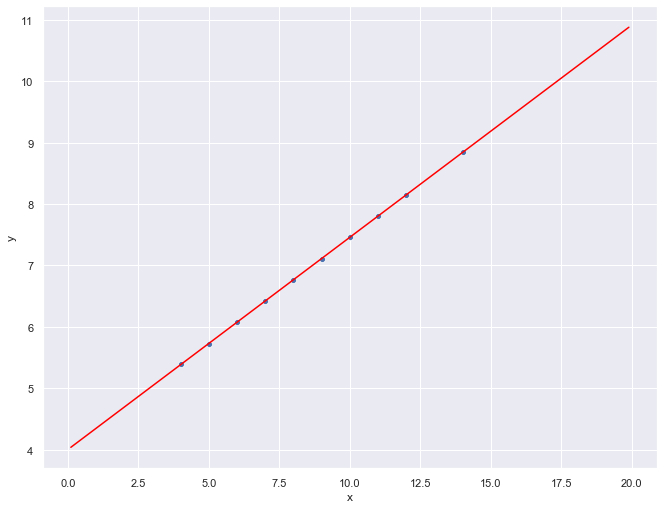

In [49]:
# graficos con seaborn
        
beta_0 = model_rl_3_new.intercept_
beta_1 = model_rl_3_new.coef_[0]
        
x_range = np.arange(0.1,20,0.1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df_3_new = pd.DataFrame({'x':X['x'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df_3_new, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot, ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Ahora, las métricas del nuevo grupo 3 serían:

In [50]:
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo 
df_temp_3_new = pd.DataFrame(
    {
        'y':df_grupo_3_new['y'],
        'yhat': model_rl_3_new.predict(df_grupo_3_new[['x']])
        }
)

df_metrics_3_new = summary_metrics(df_temp_3_new)
df_metrics_3_new['r2'] =  round(r2_score(df_grupo_3_new['y'], model_rl_3_new.predict(df_grupo_3_new[['x']])),4)
#print('\nMetricas para el regresor consumo_litros_milla:\n')
print(df_metrics_3_new)

      mae  mse    rmse    mape   maape   wmape   mmape   smape   r2
0  0.0023  0.0  0.0028  0.0003  0.0003  0.0003  0.0003  0.0003  1.0
